In [10]:
import requests
import pandas as pd

In [88]:


URL = 'https://www.binance.com/bapi/futures/v1/public/delivery/common/get-funding-rate-history'
# URL = 'https://www.binance.com/bapi/futures/v1/public/future/common/get-funding-rate-history'
SYMBOL = 'ETHUSD_PERP'

def load_funding_history(symbol, page=1, rows=1000):
  r = requests.post(
    URL,
    json={"symbol":symbol, "page":page,"rows":rows}
  )

  df= pd.DataFrame(r.json()['data'])
  df.calcTime = pd.to_datetime(df.calcTime, unit='ms')
  df.lastFundingRate = pd.to_numeric(df.lastFundingRate)
  df.set_index('calcTime', inplace=True)

  return df


In [89]:
df = pd.concat(
  [load_funding_history(SYMBOL), load_funding_history(SYMBOL, page=2)]
)

print(df.lastFundingRate[::-1].sum())
print(df.index[-1], df.index[0])

df


0.30780779999999996
2020-08-18 08:00:00 2022-01-11 16:00:00.011000


,symbol,fundingIntervalHours,lastFundingRate
calcTime,,,
2022-01-11 16:00:00.011,ETHUSD_PERP,8,-0.000077
2022-01-11 08:00:00.000,ETHUSD_PERP,8,0.000024
2022-01-11 00:00:00.000,ETHUSD_PERP,8,0.000018
2022-01-10 16:00:00.000,ETHUSD_PERP,8,-0.000065
2022-01-10 08:00:00.000,ETHUSD_PERP,8,-0.000050
...,...,...,...
2020-08-19 16:00:00.000,ETHUSD_PERP,8,0.000573
2020-08-19 08:00:00.000,ETHUSD_PERP,8,0.000524
2020-08-19 00:00:00.000,ETHUSD_PERP,8,-0.000822


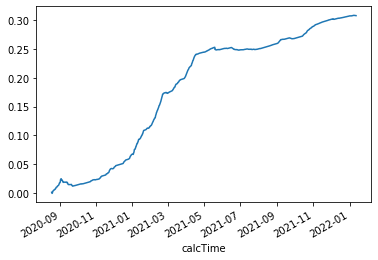

In [92]:
growth = df.lastFundingRate[::-1].cumsum()

growth.plot()

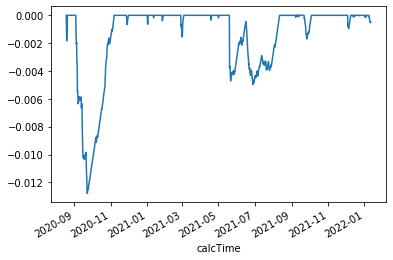

In [94]:
dd = growth - growth.cummax()

dd.plot()